# Notebook for analysing all VR trials of one experimental group 
## Assumes use of FlyOver version 9.4 or higher (closed-loop optogenetic stimulation possible)
## Data from multiple trials and flies is pooled and collected in a single data frame, which is then used for data visualisation and statistics.

In [1]:
__author__ = 'Hannah Haberkern, hjmhaberkern@gmail.com'

import numpy as np
import pandas as pd
    
from os import listdir, mkdir, walk
from os.path import isfile, sep
from sys import path, exit
from glob import glob

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import gridspec
import seaborn as sns

from Tkinter import Tk
from tkFileDialog import askdirectory, askopenfilename

path.insert(1, '/Users/hannah/Dropbox/code/flyVR/flyVRoptogenetics/')
from flyVRoptogenetics_oneTrialBasicAnalysis import singleVROptogenTrialAnalysis

path.insert(1, '/Users/hannah/Dropbox/code/plottingUtilities/')
from plottingUtilities import makeNestedPlotDirectory, myAxisTheme
from objectInteractionPlots import residencyWithHistograms_splitOnWalking, residencyWithHistograms,\
        radDistAngleCombiPlot, plotResidencyInMiniarena

path.insert(1, '/Users/hannah/Dropbox/code/trajectoryAnalysis/')
from trajectoryDerivedParams import relationToObject, cartesian2polar, polarCurvature
from plotsWithDataframe import plotVeloHeadingDistribution_flyVR_df, oneDimResidency_df

path.insert(1, '/Users/hannah/Dropbox/code/flyVR/utilities/')
from loadSingleTrial import rZoneParamsFromLogFile

# Choose files to analyse ..............................................................................................

baseDir = '/Volumes/jayaramanlab/Hannah/Projects/FlyVR/1_Experiments/'

root = Tk()
# prevents root window from appearing
root.withdraw()
# choose experiment folder
dataDir = askdirectory(initialdir=baseDir,
                       title='Select experiment directory (containing directories for multiple flies)') + sep
expDirs = sorted(walk(dataDir).next()[1])

analysisDir = sep.join(dataDir.split(sep)[:-2]) + sep + 'analysis' + sep

try:
    expDirs.remove('virtualWorld')
except:
    print('You selected an invalid data directory.\n' +
          'Expected folder structure of the selected path is some/path/to/experimentName/flyGender/rawData/')
    exit(1)

print('\n Analysing the following folders:\n')
print(expDirs)

rerunbasicanalysis = raw_input('Would you like to (re-)run the basic analysis on each file \n'
                               'instead of loading previously saved data? (y, n)\n')


 Analysing the following folders:

['m01', 'm02', 'm03', 'm04', 'm05', 'm06', 'm07']
Would you like to (re-)run the basic analysis on each file 
instead of loading previously saved data? (y, n)
n


In [2]:
#expDirs = expDirs[:15]
#from operator import itemgetter
#my_indices = [1,3,4,9,14,18] #[1,2,3,4,5,9,10,14,15,17,18]
#expDirs = itemgetter(*my_indices)(expDirs)

### Compose mutli-fly data into dataframe

In [2]:
# generate fly color map
numFlies = len(expDirs)
cNorm  = colors.Normalize(vmin=0, vmax=numFlies)
flyCMap = plt.cm.ScalarMappable(norm=cNorm,cmap='Accent')

In [3]:
expDir = dataDir + expDirs[0] + sep
FODataFiles = [filepath.split(sep)[-1] for filepath in glob(expDir + '*.txt')]

In [ ]:
def

    # Go through directories of experiments with different flies ...............................................
    for currExpDir in expDirs:

        expDir = dataDir + currExpDir + sep
        print('\n Analysing the following folder:\n')
        print(expDir)

        FODataFiles = [filepath.split(sep)[-1] for filepath in glob(expDir + '*.txt')]
        FODataFiles = sorted(FODataFiles)

        print('\n Analysing the following log files:\n')
        print(FODataFiles)

        # Run single trial analysis on each file in folder .....................................................
        for fileToAnalyse in FODataFiles:

            flyID = fileToAnalyse.split('_')[4]
            genotype = fileToAnalyse.split('_')[3]
            trial = FODataFiles.index(fileToAnalyse) + 1

            if rerunbasicanalysis == 'y':
                returnVal = singleVROptogenTrialAnalysis(expDir + fileToAnalyse)
                print('Ran analysis, now loading saved *.npy file.')
                FODatLoad = np.load(expDir + fileToAnalyse[:-3] + 'npy')[()]
            else:
                print('Loading saved *.npy file.')
                FODatLoad = np.load(expDir + fileToAnalyse[:-3] + 'npy')[()]

            # Split into visible object trials and invisible object trials
            if 'Invisible' in fileToAnalyse or 'invisible' in fileToAnalyse:
                trialtype = 'invisible'
                nTrialsIN += 1
            else:
                trialtype = 'visible'
                nTrialsVI += 1

            if 'rZones' in fileToAnalyse:
                rZones = 'on'
                nTrialsR += 1
            else:
                rZones = 'off'
                nTrialsNR += 1

            vTrans = np.copy(FODatLoad['transVelo'])
            moving = vTrans >= vTransTH

            FODatLoad_df = pd.DataFrame.from_dict(FODatLoad,orient='columns')
            FODatLoad_df.insert(0, 'flyID', flyID)
            FODatLoad_df.insert(1, 'trial', trial)
            FODatLoad_df.insert(2, 'trialtype', trialtype)
            FODatLoad_df.insert(3, 'reinforcement', rZones)
            FODatLoad_df.insert(4, 'moving', moving)

            FOAllFlies_df = FOAllFlies_df.append(FODatLoad_df)

            # TODO: Add selection criteria, e.g. to only include trials from flies that were 
            # walking >40% of time and did not have a strong turn bias.


In [4]:
keylist = ['curvature','gamma','gammaFull','headingAngle','objectDistance','rotVelo','time',
           'transVelo','xPos','xPosInMiniarena','yPos','yPosInMiniarena','rEvents']

keylistLong = ['flyID','trial','trialtype','reinforcement','moving'] + keylist
FOAllFlies_df = pd.DataFrame(data=np.zeros((0,len(keylistLong))), columns=keylistLong)

nTrialsVI = 0
nTrialsIN = 0
nTrialsR = 0
nTrialsNR = 0
 
vTransTH = 2 #mm/s

# Go through directories of experiments with different flies ...............................................
for currExpDir in expDirs:

    expDir = dataDir + currExpDir + sep
    print('\n Analysing the following folder:\n')
    print(expDir)

    FODataFiles = [filepath.split(sep)[-1] for filepath in glob(expDir + '*.txt')]
    FODataFiles = sorted(FODataFiles)

    print('\n Analysing the following log files:\n')
    print(FODataFiles)

    # Run single trial analysis on each file in folder .....................................................
    for fileToAnalyse in FODataFiles:
        
        flyID = fileToAnalyse.split('_')[4]
        genotype = fileToAnalyse.split('_')[3]
        trial = FODataFiles.index(fileToAnalyse) + 1
        
        if rerunbasicanalysis == 'y':
            returnVal = singleVROptogenTrialAnalysis(expDir + fileToAnalyse)
            print('Ran analysis, now loading saved *.npy file.')
            FODatLoad = np.load(expDir + fileToAnalyse[:-3] + 'npy')[()]
        else:
            print('Loading saved *.npy file.')
            FODatLoad = np.load(expDir + fileToAnalyse[:-3] + 'npy')[()]

        # Split into visible object trials and invisible object trials
        if 'Invisible' in fileToAnalyse or 'invisible' in fileToAnalyse:
            trialtype = 'invisible'
            nTrialsIN += 1
        else:
            trialtype = 'visible'
            nTrialsVI += 1
        
        if 'rZones' in fileToAnalyse:
            rZones = 'on'
            nTrialsR += 1
        else:
            rZones = 'off'
            nTrialsNR += 1
        
        vTrans = np.copy(FODatLoad['transVelo'])
        moving = vTrans >= vTransTH

        FODatLoad_df = pd.DataFrame.from_dict(FODatLoad,orient='columns')
        FODatLoad_df.insert(0, 'flyID', flyID)
        FODatLoad_df.insert(1, 'trial', trial)
        FODatLoad_df.insert(2, 'trialtype', trialtype)
        FODatLoad_df.insert(3, 'reinforcement', rZones)
        FODatLoad_df.insert(4, 'moving', moving)
        
        FOAllFlies_df = FOAllFlies_df.append(FODatLoad_df)
        
        # TODO: Add selection criteria, e.g. to only include trials from flies that were 
        # walking >40% of time and did not have a strong turn bias.
        


 Analysing the following folder:

/Volumes/jayaramanlab/Hannah/Projects/FlyVR/1_Experiments/FlyOver094/constantVHeat/groundPlaneTest/HC-Gal4_x_20CsChrWTB_retinal/male/rawData/m01/

 Analysing the following log files:

['singleObjectForest_1cm4cmCone_12cmHex10000wn_HC-Gal4x20xCsChrWTB_m01_7-8d_out_160217163819.txt', 'singleObjectForest_1cm4cmCone_12cmHexGrey_HC-Gal4x20xCsChrWTB_m01_7-8d_out_160217160149.txt', 'singleObjectForest_1cm4cmInvisibleCone_12cmHex10000wn_HC-Gal4x20xCsChrWTB_m01_7-8d_out_160217161410.txt', 'singleObjectForest_1cm4cmInvisibleCone_12cmHexGrey_HC-Gal4x20xCsChrWTB_m01_7-8d_out_160217162550.txt']
Loading saved *.npy file.
Loading saved *.npy file.
Loading saved *.npy file.
Loading saved *.npy file.

 Analysing the following folder:

/Volumes/jayaramanlab/Hannah/Projects/FlyVR/1_Experiments/FlyOver094/constantVHeat/groundPlaneTest/HC-Gal4_x_20CsChrWTB_retinal/male/rawData/m02/

 Analysing the following log files:

['singleObjectForest_1cm4cmCone_12cmHex10000wn_HC-Gal

In [5]:
FOAllFlies_df = FOAllFlies_df[keylistLong]

FOAllFlies_df['flyID'] = FOAllFlies_df['flyID'].astype('category')
FOAllFlies_df['trial'] = FOAllFlies_df['trial'].astype('category')
FOAllFlies_df['trialtype'] = FOAllFlies_df['trialtype'].astype('category')
FOAllFlies_df['reinforcement'] = FOAllFlies_df['reinforcement'].astype('category')

FOAllFlies_df 

flyID trial  trialtype reinforcement  moving  curvature     gamma  \
0       m01     1    visible           off       0        NaN       NaN   
1       m01     1    visible           off       0        NaN       NaN   
2       m01     1    visible           off       0        NaN       NaN   
3       m01     1    visible           off       0        NaN       NaN   
4       m01     1    visible           off       1        NaN       NaN   
5       m01     1    visible           off       1        NaN       NaN   
6       m01     1    visible           off       1        NaN       NaN   
7       m01     1    visible           off       1        NaN       NaN   
8       m01     1    visible           off       1        NaN       NaN   
9       m01     1    visible           off       1        NaN       NaN   
10      m01     1    visible           off       1        NaN       NaN   
11      m01     1    visible           off       1        NaN       NaN   
12      m01     1    visible           off       1        NaN       NaN   
13      m01     1    visible           off       1        NaN       NaN   
14      m01     1    visible           off       1        NaN       NaN   
15      m01     1    visible           off       1        NaN       NaN   
16      m01     1    visible           off       1        NaN       NaN   
17      m01     1    visible           off       1        NaN       NaN   
18      m01     1    visible           off       1        NaN       NaN   
19      m01     1    visible           off       1        NaN       NaN   
20      m01     1    visible           off       1        NaN       NaN   
21      m01     1    visible           off       1        NaN       NaN   
22      m01     1    visible           off       1        NaN       NaN   
23      m01     1    visible           off       1        NaN       NaN   
24      m01     1    visible           off       1        NaN       NaN   
25      m01     1    visible           off       1        NaN       NaN   
26      m01     1    visible           off       1        NaN       NaN   
27      m01     1    visible           off       1        NaN  0.666719   
28      m01     1    visible           off       1        NaN  0.620985   
29      m01     1    visible           off       1        NaN  0.573930   
...     ...   ...        ...           ...     ...        ...       ...   
11970   m07     4  invisible           off       0        NaN  0.668372   
11971   m07     4  invisible           off       0        NaN  0.668372   
11972   m07     4  invisible           off       0        NaN  0.668372   
11973   m07     4  invisible           off       0        NaN  0.668372   
11974   m07     4  invisible           off       0        NaN  0.668372   
11975   m07     4  invisible           off       0        NaN  0.672281   
11976   m07     4  invisible           off       0        NaN  0.672281   
11977   m07     4  invisible           off       0        NaN  0.672281   
11978   m07     4  invisible           off       1        NaN  0.676192   
11979   m07     4  invisible           off       1        NaN  0.672203   
11980   m07     4  invisible           off       1        NaN  0.604158   
11981   m07     4  invisible           off       0        NaN  0.465225   
11982   m07     4  invisible           off       0        NaN  0.396603   
11983   m07     4  invisible           off       1        NaN  0.344876   
11984   m07     4  invisible           off       1        NaN  0.232008   
11985   m07     4  invisible           off       1        NaN  0.114512   
11986   m07     4  invisible           off       1        NaN  0.017487   
11987   m07     4  invisible           off       1        NaN  0.053672   
11988   m07     4  invisible           off       1        NaN  0.098112   
11989   m07     4  invisible           off       1        NaN  0.120732   
11990   m07     4  invisible           off       0        NaN  0.124504   
11991   m07     4  invisible   

In [6]:
keyind_xPos = keylistLong.index('xPosInMiniarena')
keyind_yPos = keylistLong.index('yPosInMiniarena')
keyind_mov = keylistLong.index('moving')
keyind_gam = keylistLong.index('gamma')
keyind_gamful = keylistLong.index('gammaFull')
keyind_fly = keylistLong.index('flyID')
keyind_vT = keylistLong.index('transVelo')
keyind_ang = keylistLong.index('headingAngle')
keyind_t = keylistLong.index('time')
keyind_vR = keylistLong.index('rotVelo')
keyind_objD = keylistLong.index('objectDistance')

flyIDallarray = np.asarray(FOAllFlies_df.iloc[:,keyind_fly:keyind_fly+1]).squeeze()
flyIDs = sorted(list(set(flyIDallarray.tolist())))

arenaRad = 60

### Define structure of trials in terms of closed-loop optogenetic stimulation and presence of landmark cues

In [10]:
# Reinforcement test
rZoneState = ['off','off','on','on']
visibilityState = ['visible','visible','visible','invisible']
trialOrder = [0,2,1,3]
trialName = ['1','3','2','4']

rZone_rInner, rZone_rOuter, rZone_max, rZone_gExp = rZoneParamsFromLogFile(expDir, fileToAnalyse)

In [12]:
# Ground plane contrast test
rZoneState = ['off','off','off','off']
visibilityState = ['visible','visible','invisible','invisible']
groundPlane = ['texture','grey','texture','grey']
trialOrder = [0,2,1,3]
trialName = ['1','3','2','4']

In [8]:
%matplotlib inline 

/Users/hannah/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


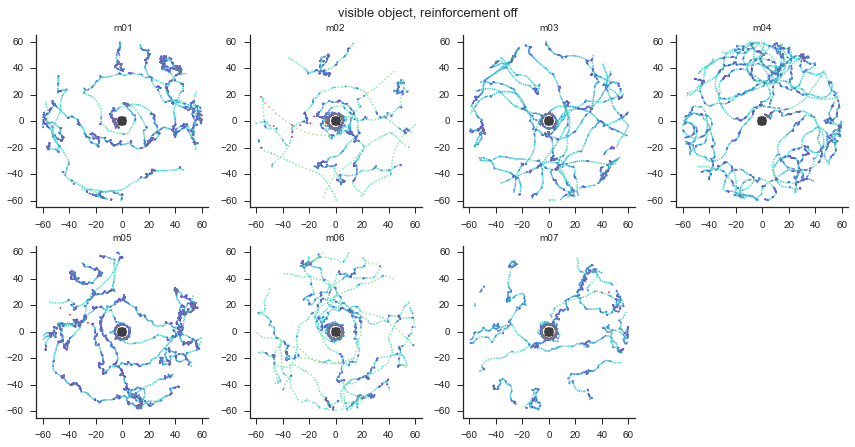

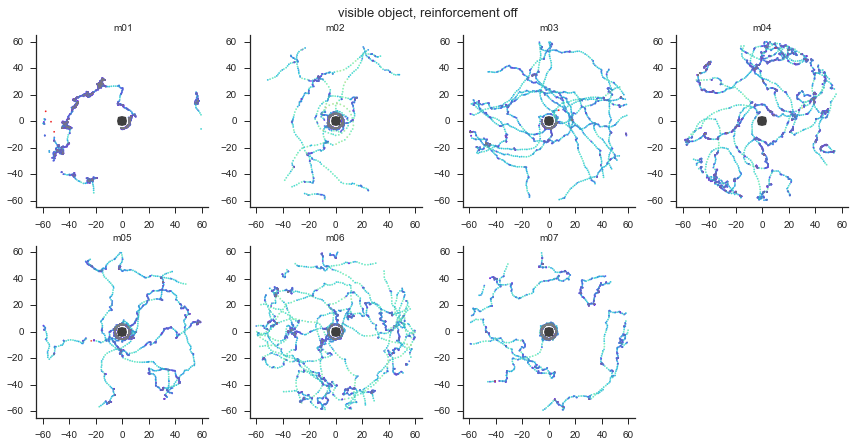

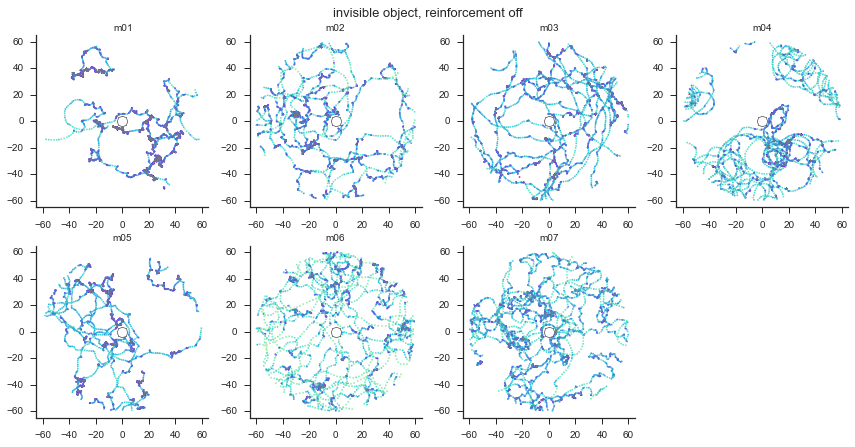

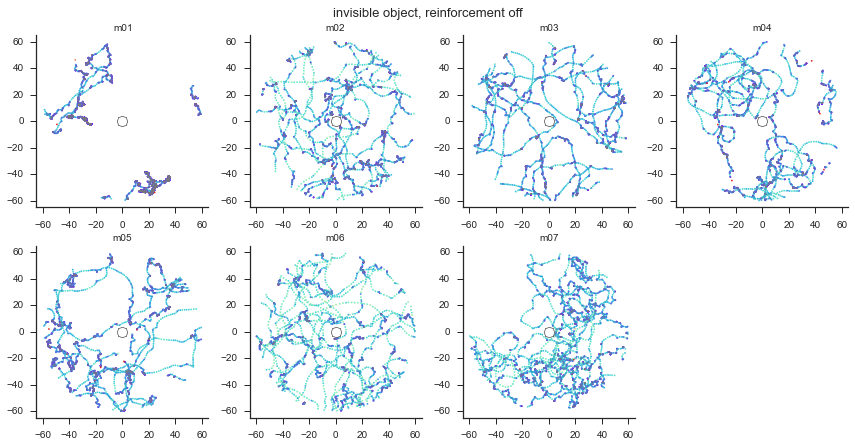

In [10]:
nrows = np.ceil(numFlies/4.0)
for ttind,trialtype in enumerate(visibilityState):
    multiflyTracePlot = plt.figure(figsize=(12,3*nrows))
    figtitle = multiflyTracePlot.suptitle(trialtype + ' object, reinforcement ' + rZoneState[ttind] ,fontsize=13,y=1.02)
    for fly in range(numFlies):
        multiflyTracePlot_sbplt = multiflyTracePlot.add_subplot(nrows,4,fly+1)
       
        querystring = '(trialtype=="' + trialtype + '") & (trial==' + str(ttind+1) + ') & (flyID =="' + flyIDs[fly] +  '")'

        perFlyX = FOAllFlies_df.query(querystring).iloc[:,keyind_xPos:keyind_xPos+1].squeeze()
        perFlyY = FOAllFlies_df.query(querystring).iloc[:,keyind_yPos:keyind_yPos+1].squeeze()
        perFlyvT = FOAllFlies_df.query(querystring).iloc[:,keyind_vT:keyind_vT+1].squeeze()
        
        selectPts = range(0,len(perFlyX),3)
        #color = scalarMap.to_rgba(timecolor), alpha = 0.1)
        multiflyTracePlot_sbplt.plot(perFlyX[selectPts],perFlyY[selectPts],'.',markersize=3,color='grey',alpha=0.2)
        multiflyTracePlot_sbplt.scatter(perFlyX[selectPts],perFlyY[selectPts],s=3, c=perFlyvT[selectPts], cmap='rainbow',
                                        vmin=-1, vmax=35, edgecolor='none',alpha=0.9)
        
        if (trialtype == 'visible'):
            multiflyTracePlot_sbplt.plot(0, 0, marker='o', markersize=10, linestyle='none', alpha=0.75, color='black')
        else:
            multiflyTracePlot_sbplt.plot(0, 0, marker='o', markersize=10, alpha=0.75, markeredgewidth=0.5,
                                         markerfacecolor='None',markeredgecolor='black')

        if(rZoneState[ttind]=='on'):
            rZoneRange = float(rZone_rOuter - rZone_rInner)
            for zRad in range(rZone_rInner, rZone_rOuter):
                circle1 = plt.Circle((0, 0), zRad, color='r', alpha=1.0/rZoneRange)
                multiflyTracePlot_sbplt.add_artist(circle1)
        
        myAxisTheme(multiflyTracePlot_sbplt)
        multiflyTracePlot_sbplt.set_title(flyIDs[fly],fontsize=10)
        multiflyTracePlot_sbplt.set_aspect('equal')
        multiflyTracePlot_sbplt.set_xlim(-arenaRad-5, arenaRad + 5)
        multiflyTracePlot_sbplt.set_ylim(-arenaRad-5, arenaRad + 5)
        
    multiflyTracePlot.tight_layout()
    
    # analysisDir + 'tracePlotMA/' should already exist from single trial analysis
    # makeNestedPlotDirectory(analysisDir, 'tracePlotMA/', objecttype + sep)
    multiflyTracePlot.savefig(analysisDir +'tracePlotMA/'+ genotype +'_'+flyIDs[0][0] +'_'+ trialtype +'_rZones'+ rZoneState[ttind]
                              +'_traceVeloColored_trial'+ str(ttind+1) +'_n'+ str(len(flyIDs)) +'.pdf', format='pdf', 
                              bbox_extra_artists=(figtitle,), bbox_inches='tight')

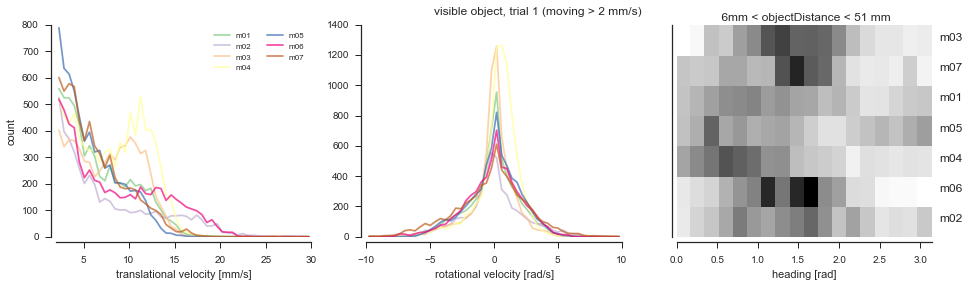

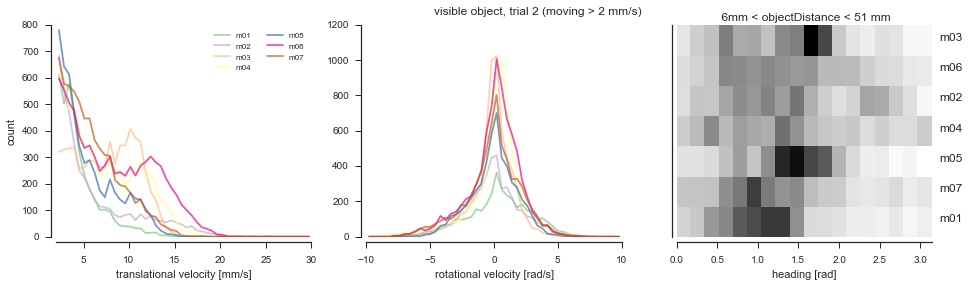

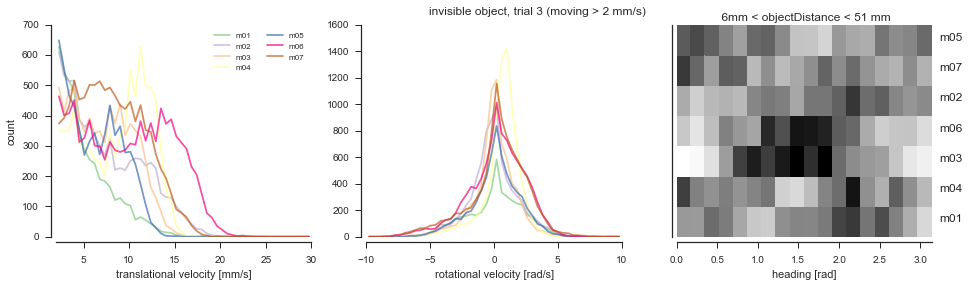

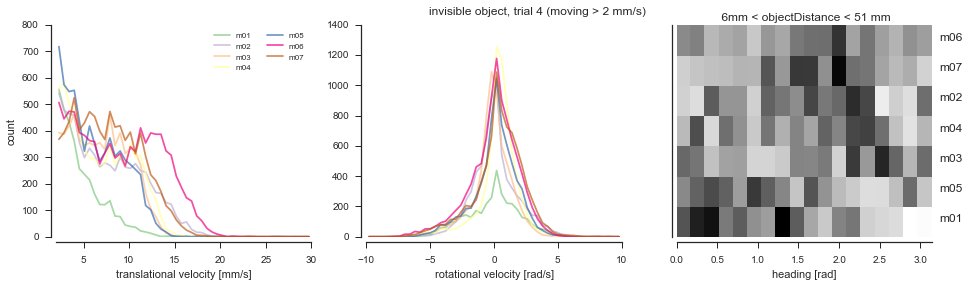

In [61]:
for ttind,trialtype in enumerate(visibilityState):
    
    veloDistFig = plotVeloHeadingDistribution_flyVR_df(FOAllFlies_df, trialtype, str(ttind+1), flyIDs, keylistLong, vTransTH)

    veloDistFig.tight_layout()

    # rZoneState[ttind]
    #makeNestedPlotDirectory(analysisDir, 'velocityTraces/', objecttype + sep)
    # analysisDir + 'velocityTraces/' should already exist from single trial analysis
    veloDistFig.savefig(analysisDir + 'velocityTraces/'+ genotype +'_'+flyIDs[0][0]+ '_' + trialtype + '_rZones' + rZoneState[ttind]
                + '_veloDistributions_trial' + str(ttind+1) + '_n'+ str(len(flyIDs)) + '.pdf', format='pdf')

Plot directory already exists
Plot directory already exists
(reinforcement == "on") & (trialtype == "visible") does not exist
Plot directory already exists
(reinforcement == "on") & (trialtype == "invisible") does not exist
Plot directory already exists


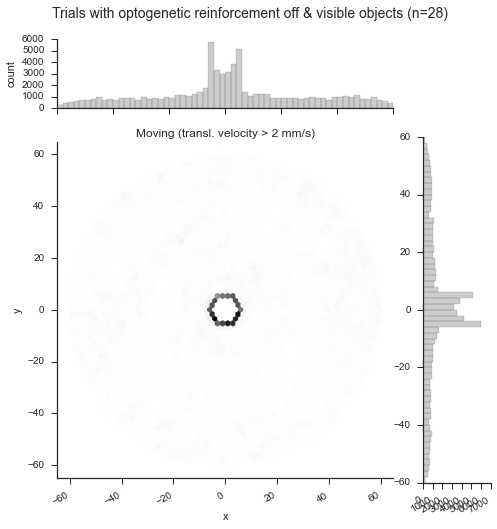

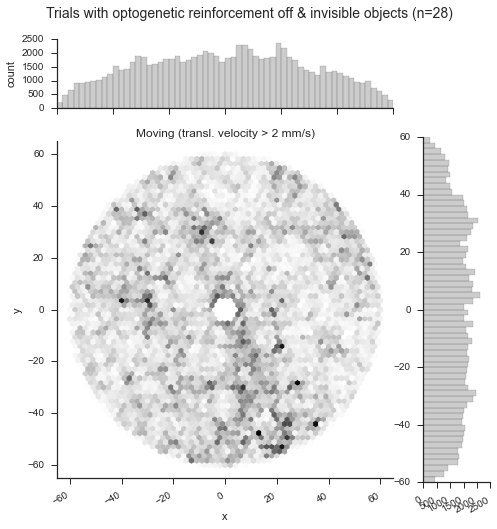

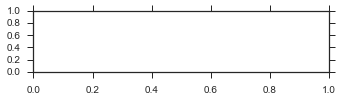

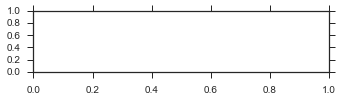

In [62]:
# make fly summary plot of residency:
arenaRad = 60
numBins = 60

keyind_xPos = keylistLong.index('xPosInMiniarena')
keyind_yPos = keylistLong.index('yPosInMiniarena')
keyind_mov = keylistLong.index('moving')
keyind_vT = keylistLong.index('transVelo')

nTrials = (nTrialsNR,nTrialsR/2,nTrialsR/2)

for indcond, condition in enumerate(['off', 'on']):
    for indcond2, condition2 in enumerate(['visible', 'invisible']):
        try:
            querystring = '(reinforcement == "' + condition + '") & (trialtype == "' + condition2 + '")'
            xPosMAall = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_xPos:keyind_xPos+1]).squeeze()
            yPosMAall = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_yPos:keyind_yPos+1]).squeeze()
            movingall = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_mov:keyind_mov+1]).squeeze().astype('bool')
            vT = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_vT:keyind_vT+1]).squeeze()

            movingall = vT>vTransTH

            # make plot
            noNans = ~np.isnan(xPosMAall)
            hexplotfig = residencyWithHistograms(
                xPosMAall[noNans], yPosMAall[noNans], movingall[noNans], arenaRad, numBins, vTransTH,
                'Trials with optogenetic reinforcement ' +condition+ ' & '+condition2+' objects (n=' + str(nTrials[indcond]) + ')')

        except ValueError:
            print('(reinforcement == "' + condition + '") & (trialtype == "' + condition2 + '") does not exist')
        
        try:
            mkdir(analysisDir + 'residencyPlots/')
        except:
            print('Plot directory already exists')
        hexplotfig.savefig(analysisDir + 'residencyPlots/'+ genotype +'_'+flyIDs[0][0]+'_'+condition2+'Objects_rZones' + condition
                            + '_residencyMA_n'+ str(len(flyIDs)) +'.pdf', format='pdf')


Plot directory already exists


ValueError: x must have at least one data point

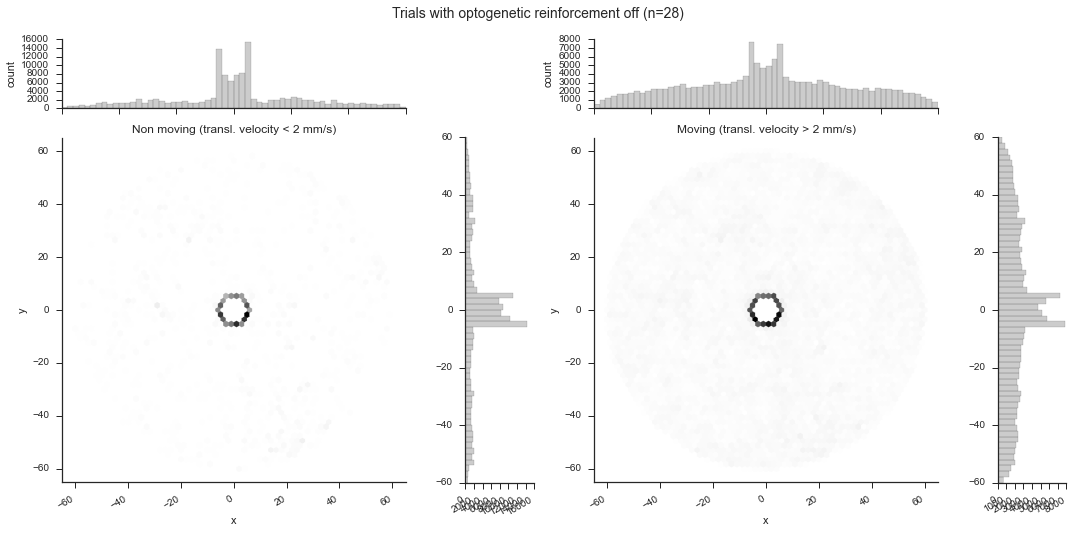

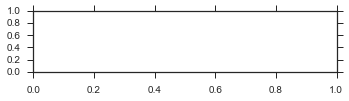

In [63]:
# make fly summary plot of residency:
arenaRad = 60
numBins = 60

keyind_xPos = keylistLong.index('xPosInMiniarena')
keyind_yPos = keylistLong.index('yPosInMiniarena')
keyind_mov = keylistLong.index('moving')
keyind_vT = keylistLong.index('transVelo')

nTrials = (nTrialsNR,nTrialsR)

for indcond, condition in enumerate(['off', 'on']):
    querystring = '(reinforcement == "' + condition + '")'
    xPosMAall = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_xPos:keyind_xPos+1]).squeeze()
    yPosMAall = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_yPos:keyind_yPos+1]).squeeze()
    movingall = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_mov:keyind_mov+1]).squeeze().astype('bool')
    vT = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_vT:keyind_vT+1]).squeeze()

    movingall = vT>vTransTH

    # make plot
    noNans = ~np.isnan(xPosMAall)
    hexplotfig = residencyWithHistograms_splitOnWalking(
        xPosMAall[noNans], yPosMAall[noNans], movingall[noNans], arenaRad, numBins, vTransTH,
        'Trials with optogenetic reinforcement ' + condition + ' (n=' + str(nTrials[indcond]) + ')')

    try:
        mkdir(analysisDir + 'residencyPlots/')
    except:
        print('Plot directory already exists')
    hexplotfig.savefig(analysisDir + 'residencyPlots/'+ genotype +'_'+flyIDs[0][0]+'_rZones' + condition
                        + '_residencyMA_splitonwaling_n'+ str(len(flyIDs)) +'.pdf', format='pdf')

### 1D residency

Plot directory already exists


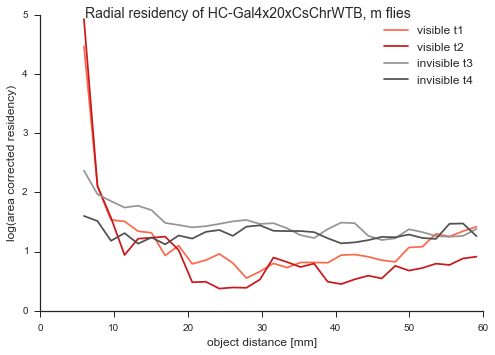

In [245]:
movementFilter = 'moving > 0'
numBins = 30
histRange = (5,arenaRad)

radResFig = plt.figure(figsize=(7,5))
radResFig.suptitle('Radial residency of '+genotype+', '+flyIDs[0][0]+' flies',fontsize=14)
radResPlt = radResFig.add_subplot(111)

radResPlt = oneDimResidency_df(radResPlt, FOAllFlies_df, movementFilter, visibilityState, numBins, histRange)
myAxisTheme(radResPlt)

try:
    mkdir(analysisDir + 'residencyPlots/')
except:
    print('Plot directory already exists')
hexplotfig.savefig(analysisDir + 'residencyPlots/'+ genotype +'_'+flyIDs[0][0]
                    + '_radialResidency_n'+ str(len(flyIDs)) +'.pdf', format='pdf')

### Turn rate vs. distance

In [208]:
def getTurnHistCounts(rotMeasure, objDist, turnTH, turnTH_neg, turnTH_pos, numBins, histDRange):
    
    d_objDist = np.hstack((0, np.diff(objDist)))
    
    selectPts_apr = d_objDist<0
    selectPts_dep = d_objDist>0
    
    def getTurnCounts(rotMeas,selectPts,tTH,tTH_neg,tTH_pos,histDRange):
        selectPts_turn = np.logical_and(selectPts,abs(rotMeas) > tTH)
        selectPts_turnR = np.logical_and(selectPts,rotMeas < tTH_neg)
        selectPts_turnL = np.logical_and(selectPts,rotMeas > tTH_pos)
        
        [nTL,edges] = np.histogram(objDist[selectPts_turnL],bins=numBins,range=histDRange)
        [nTR,edges] = np.histogram(objDist[selectPts_turnR],bins=numBins,range=histDRange)
        [nT,edges] = np.histogram(objDist[selectPts_turn],bins=numBins,range=histDRange)
        [nDt,edges] = np.histogram(objDist[selectPts],bins=numBins,range=histDRange)
        
        return nTL,nTR,nT,nDt,edges
    
    nTL_apr, nTR_apr, nT_apr, nDt_apr, edges = getTurnCounts(rotMeasure,selectPts_apr,turnTH,turnTH_neg,turnTH_pos,histDRange)

    nTL_dep, nTR_dep, nT_dep, nDt_dep, edges = getTurnCounts(rotMeasure,selectPts_dep,turnTH,turnTH_neg,turnTH_pos,histDRange)
    
    return nTL_apr, nTL_dep, nTR_apr, nTR_dep, nT_apr, nT_dep, nDt_apr, nDt_dep,edges

In [209]:
def getTurnStartHistCounts(rotMeasure, objDist, turnTH, turnTH_neg, turnTH_pos, numBins, histDRange):
    
    d_objDist = np.hstack((0, np.diff(objDist)))
    
    selectPts_apr = d_objDist<0
    selectPts_dep = d_objDist>0
    
    turns = abs(rotMeasure) > turnTH
    tst = np.zeros(len(turns))
    tst[1:]= np.diff(turns)== 1
    
    turnsL = rotMeasure > turnTH_pos
    tstL = np.zeros(len(turnsL))
    tstL[1:]= np.diff(turnsL)== 1
    
    turnsR = rotMeasure < turnTH_neg
    tstR = np.zeros(len(turnsR))
    tstR[1:]= np.diff(turnsR)== 1
    
    def getTurnCounts(selectPts,turnSt,turnStL,turnStR,histDRange):
        selectPts_turn = np.logical_and(selectPts,turnSt)
        selectPts_turnR = np.logical_and(selectPts,turnStR)
        selectPts_turnL = np.logical_and(selectPts,turnStL)
        
        [nTL,edges] = np.histogram(objDist[selectPts_turnL],bins=numBins,range=histDRange)
        [nTR,edges] = np.histogram(objDist[selectPts_turnR],bins=numBins,range=histDRange)
        [nT,edges] = np.histogram(objDist[selectPts_turn],bins=numBins,range=histDRange)
        [nDt,edges] = np.histogram(objDist[selectPts],bins=numBins,range=histDRange)
        
        return nTL,nTR,nT,nDt,edges
    
    nTL_apr, nTR_apr, nT_apr, nDt_apr, edges = getTurnCounts(selectPts_apr,tst,tstL,tstR,histDRange)

    nTL_dep, nTR_dep, nT_dep, nDt_dep, edges = getTurnCounts(selectPts_dep,tst,tstL,tstR,histDRange)
    
    return nTL_apr, nTL_dep, nTR_apr, nTR_dep, nT_apr, nT_dep, nDt_apr, nDt_dep,edges

In [218]:
def turnRatePerDistance(Fig,FOAllFlies_df,visState,movementFilter,useTurnIndex):
    keyind_xPos = keylistLong.index('xPosInMiniarena')
    keyind_yPos = keylistLong.index('yPosInMiniarena')
    keyind_vT = keylistLong.index('transVelo')
    keyind_vR = keylistLong.index('rotVelo')
    
    # Find turnTH over all flies
    querystring = '('+movementFilter+') & (objectDistance>6)'
    vRot = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_vR:keyind_vR+1]).squeeze()
    
    if useTurnIndex:
        vTrans = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_vT:keyind_vT+1]).squeeze()
        vRot_filt = np.convolve(vRot/vTrans, np.ones((5,))/5, mode='same')
        vRot_filt[np.isinf(abs(vRot_filt))] = 0.0
    else:
        vRot_filt = np.convolve(vRot, np.ones((5,))/5, mode='same')
        
    turnTH_pos = 2*np.nanstd(vRot_filt[vRot_filt>=0])
    turnTH_neg = -2*np.nanstd(vRot_filt[vRot_filt<=0])
    turnTH = 2*np.nanstd(abs(vRot_filt))

    axApr = Fig.add_subplot(121)
    axApr.set_title('Approaches', fontsize=12)
    axDep = Fig.add_subplot(122)
    axDep.set_title('Departures', fontsize=12)
    
    
    numInvTrials = sum(['invisible' in visState[trial] for trial in range(len(visState))])
    numVisTrials = len(visState)-numInvTrials

    visAprCMap = plt.cm.ScalarMappable(norm=colors.Normalize(vmin=-2, vmax=numVisTrials),cmap='Blues')
    visDepCMap = plt.cm.ScalarMappable(norm=colors.Normalize(vmin=-2, vmax=numVisTrials),cmap='Greens')
    invAprCMap = plt.cm.ScalarMappable(norm=colors.Normalize(vmin=-2, vmax=numInvTrials),cmap='Greys')
    invDepCMap = plt.cm.ScalarMappable(norm=colors.Normalize(vmin=-2, vmax=numInvTrials),cmap='Greys')

    legendText = []

    for trial,objecttype in enumerate(visibilityState):
        querystring = '(trialtype=="'+objecttype+'") & (trial=='+str(trial+1)+') & ('+movementFilter+') & (objectDistance>6)'
        xPosFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_xPos:keyind_xPos+1]).squeeze()
        yPosFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_yPos:keyind_yPos+1]).squeeze()
        vRotFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_vR:keyind_vR+1]).squeeze()

        objDist,theta = cartesian2polar(xPosFly,yPosFly)
        d_objDist = np.hstack((0, np.diff(objDist)))
        
        if useTurnIndex:
            vTransFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_vT:keyind_vT+1]).squeeze()
            vRotFly_filt = np.convolve(vRotFly/vTransFly, np.ones((5,))/5, mode='same')
        else:
            vRotFly_filt = np.convolve(vRotFly, np.ones((5,))/5, mode='same')

        # Get counts
        nTL_apr, nTL_dep, nTR_apr, nTR_dep, nT_apr, nT_dep, nDt_apr, nDt_dep, edges\
            = getTurnHistCounts(vRotFly_filt, objDist, turnTH, turnTH_neg, turnTH_pos, numBins, (6,56))
            
        if objecttype=='visible':
            axApr.plot(edges[:-1]+np.mean(np.diff(edges))/2.0,1.0*nT_apr/nDt_apr,color=visAprCMap.to_rgba(0.5+trial%numVisTrials))
            axDep.plot(edges[:-1]+np.mean(np.diff(edges))/2.0,1.0*nT_dep/nDt_dep,color=visDepCMap.to_rgba(0.5+trial%numVisTrials))
        else:
            axApr.plot(edges[:-1]+np.mean(np.diff(edges))/2.0,1.0*nT_apr/nDt_apr,color=invAprCMap.to_rgba(0.5+trial%numVisTrials))
            axDep.plot(edges[:-1]+np.mean(np.diff(edges))/2.0,1.0*nT_dep/nDt_dep,color=invDepCMap.to_rgba(0.5+trial%numVisTrials))
            
        legendText.append(objecttype + ', t'+str(trial+1))

    axApr.set_ylabel('normalised turn count')
    
    for ax in [axApr,axDep]:
        ax.set_xlabel('object distance [mm]')
        #ax.set_ylim(0,0.2)
        ax.set_xlim(0,arenaRad)
        ax.legend(legendText)
        myAxisTheme(ax)

    Fig.tight_layout()
    
    return Fig

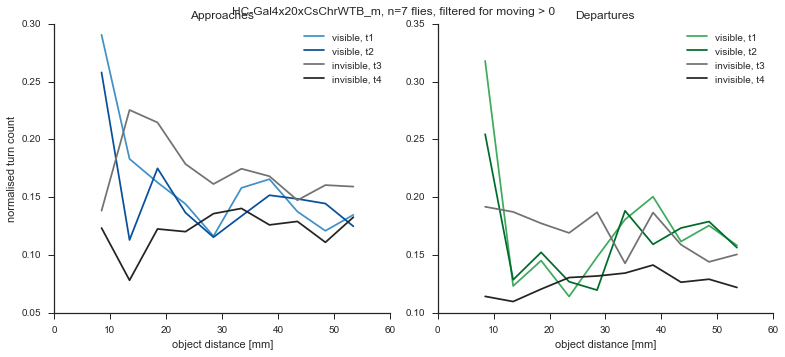

In [220]:
numBins = 10
useTurnIndex = False

movementFilter='moving > 0'
Fig = plt.figure(figsize=(11,5))
Fig.suptitle(genotype +'_'+flyIDs[0][0]+', n='+str(numFlies)+' flies, filtered for '+movementFilter , fontsize=12)
Fig = turnRatePerDistance(Fig,FOAllFlies_df,visibilityState,movementFilter,useTurnIndex)

## Heading vs. distance

Analysis directory already exists.


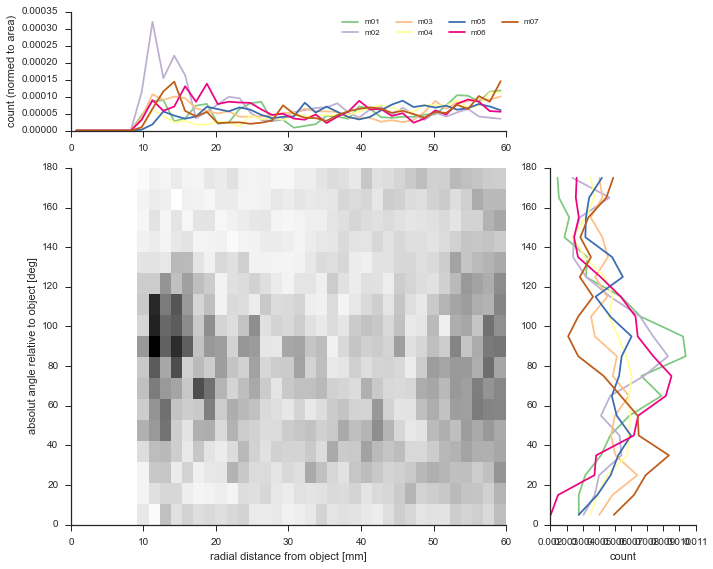

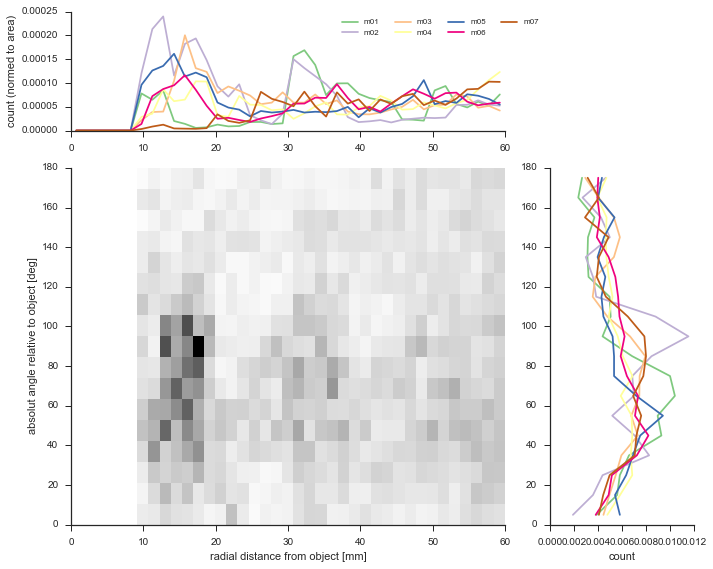

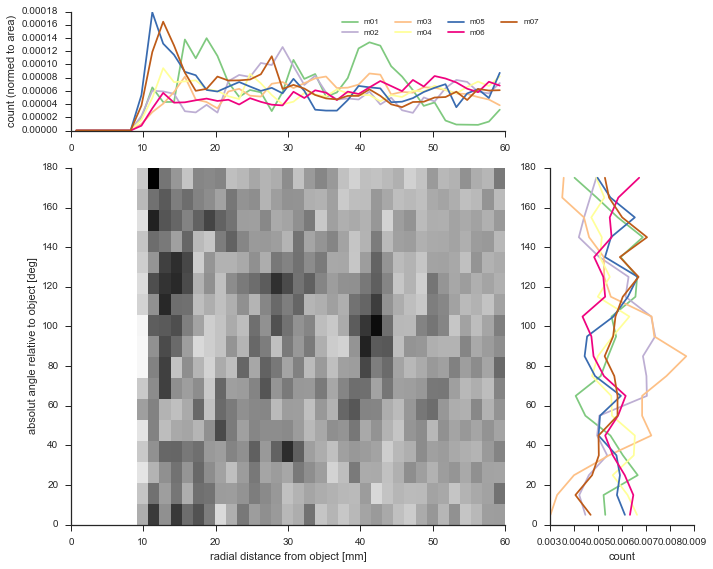

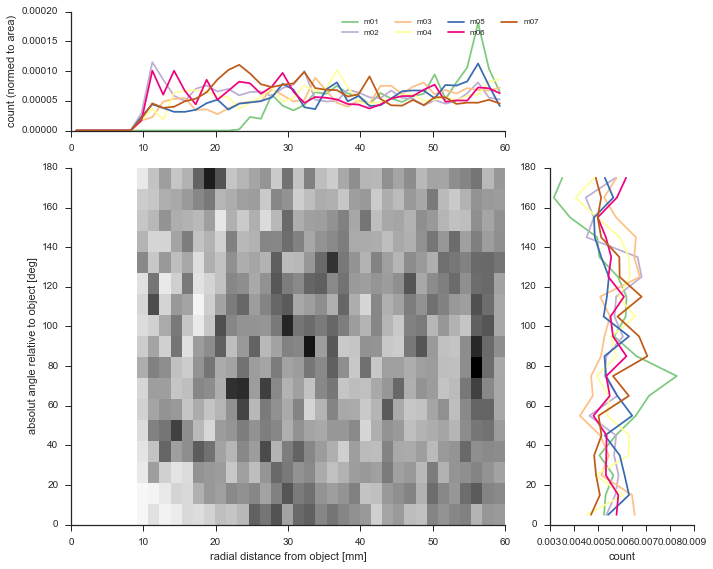

In [236]:
try:
    mkdir(analysisDir + sep + 'headingVsDistance' + sep)
except OSError:
    print('Analysis directory already exists.')

# plot parameter
distBins = 40
angleBins = 18
maxDist = arenaRad
minDist = 10

# Note: Line plot alphas are proportional to amount of data the respective fly contrinuted
for ttind,trialtype in enumerate(visibilityState):
    querystring = '(trialtype == "'+trialtype+'") & (trial == '+str(ttind+1)+\
        ') & (moving > 0) & (objectDistance>'+str(minDist)+') & (objectDistance<' + str(maxDist) + ')'
    xPosMAall = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_xPos:keyind_xPos+1]).squeeze()
    yPosMAall = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_yPos:keyind_yPos+1]).squeeze()
    gammaall = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_gam:keyind_gam+1]).squeeze()
    flyIDallarray = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_fly:keyind_fly+1]).squeeze()

    headingDistFig = radDistAngleCombiPlot(distBins,angleBins,maxDist,flyIDs,flyIDallarray,xPosMAall,yPosMAall,gammaall)

    headingDistFig.savefig(analysisDir + 'headingVsDistance/'+ genotype +'_'+flyIDs[0][0]+'_' + trialtype
                           + '_headingVsDistanceHist_trial'+ str(ttind+1) +'_n'+ str(len(flyIDs)) +'.pdf',
                           format='pdf')

### Comparison between trials

In [93]:
#TODO wrap into nice function

Analysis directory already exists.


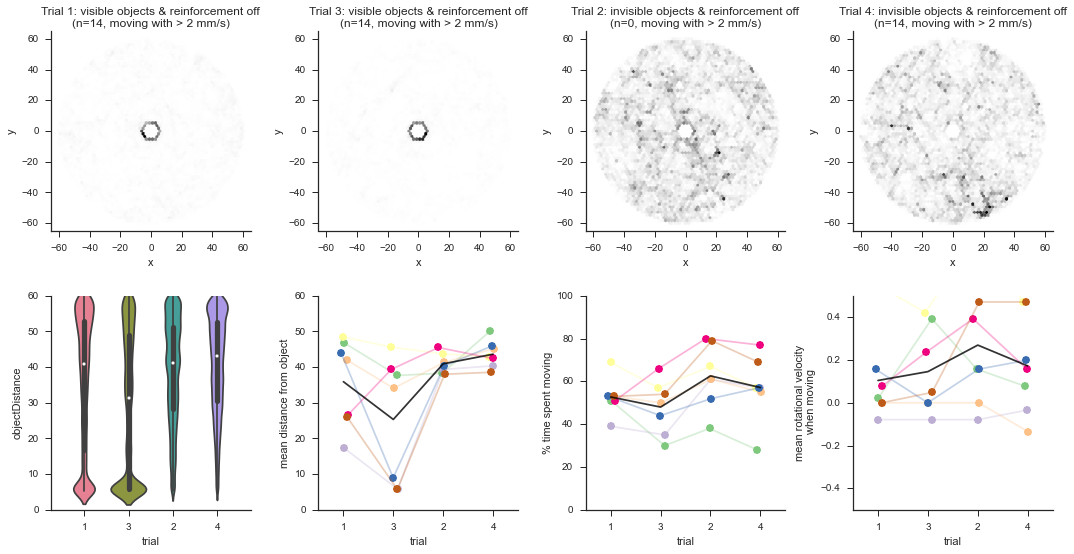

In [102]:
# make fly summary plot of residency:
arenaRad = 60
numBins = 60

numtrials = 4
numVItrials = 1

trialComparisonFig = plt.figure(figsize=(15,8))
gs = gridspec.GridSpec(2,4*numtrials,height_ratios=[1,0.9])

nTrial = [nTrialsNR/2, nTrialsNR/2,nTrialsR/2, nTrialsIN]

# Top row of plots: residency histograms ................................................................................
for trial in range(numtrials):
    querystring = '(trial == ' + str(trial+1) + ')'
    xPosMAall = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_xPos:keyind_xPos+1]).squeeze()
    yPosMAall = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_yPos:keyind_yPos+1]).squeeze()
    movingall = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_mov:keyind_mov+1]).squeeze().astype('bool')

    # make plot
    sbplt = trialComparisonFig.add_subplot(gs[0,trial*4:(trial+1)*4])
    
    noNans = ~np.isnan(xPosMAall)
    titlestring = 'Trial '+trialName[trial]+': '+visibilityState[trial]+' objects & reinforcement '+rZoneState[trial]+'\n(n='+str(nTrial[trial])+', moving with > '+str(vTransTH)+' mm/s)'

    hexplotfig_trial = plotResidencyInMiniarena(sbplt, xPosMAall[noNans][movingall[noNans]],
                                                yPosMAall[noNans][movingall[noNans]],numBins, arenaRad,
                                                'Greys',titlestring)

# Bottom row plots: ....................................................................................................

# Violinplot
FOAllFliesMoving_df = FOAllFlies_df.query('(moving > 0)')
FOAllFliesMoving_df = FOAllFliesMoving_df[keylistLong]

perTrialVPlot = trialComparisonFig.add_subplot(gs[1,numtrials*0:numtrials*1])
sns.violinplot(x='trial', y='objectDistance',data=FOAllFliesMoving_df,
               palette='husl',sym='', bw=.1)
perTrialVPlot.set_ylim(0,arenaRad)
perTrialVPlot.set_xlim(-0.75,numtrials-.25)
plt.xticks([0,1,2,3],trialName, rotation='horizontal')
myAxisTheme(perTrialVPlot)

# Plots of (a) percent of time spent moving, (b) rotational bias and (c) mean distance from object
percentMoving = np.zeros((numFlies,numtrials))
rotationBias = np.zeros((numFlies,numtrials))
meanObjDist = np.zeros((numFlies,numtrials))
randJitter = np.zeros((numFlies,numtrials))

perFlyMeanDistPlt = trialComparisonFig.add_subplot(gs[1,numtrials*1:numtrials*2])
plt.xticks([1,2,3,4],trialName, rotation='horizontal')

perFlyMovingPlt = trialComparisonFig.add_subplot(gs[1,numtrials*2:numtrials*3])
plt.xticks([1,2,3,4],trialName, rotation='horizontal')

perFlyRotBiasPlt = trialComparisonFig.add_subplot(gs[1,numtrials*3:numtrials*4])
plt.xticks([1,2,3,4],trialName, rotation='horizontal')


for fly in range(numFlies):
    for trial in range(numtrials):
        
        jitter = np.random.uniform(-0.1, 0.1)
        randJitter[fly,trial] = jitter
        
        querystring = '(trial == ' + str(trial+1) + ') & (flyID == "'+ flyIDs[fly] +  '")'
        perFlyMoving = FOAllFlies_df.query(querystring).iloc[:,keyind_mov:keyind_mov+1].squeeze().astype('bool')
        
        querystring = '(trial == ' + str(trial+1) + ') & (flyID == "'+ flyIDs[fly] +  '") & (moving > 0)'
        perFlyRot = FOAllFlies_df.query(querystring).iloc[:,keyind_vR:keyind_vR+1].squeeze().astype('float')
        perFlyObjDist = FOAllFlies_df.query(querystring).iloc[:,keyind_objD:keyind_objD+1].squeeze().astype('float')
        
        percentMoving[fly,trial] = 100*sum(perFlyMoving)/max(1,len(perFlyMoving))
        rotationBias[fly,trial] = np.nanmedian(perFlyRot)
        meanObjDist[fly,trial] = np.nanmedian(perFlyObjDist)
        
        perFlyMovingPlt.plot(trial+1+jitter,percentMoving[fly,trial],'.',
                             markersize=15,color = flyCMap.to_rgba(fly))

        perFlyRotBiasPlt.plot(trial+1+jitter,rotationBias[fly,trial],'.',
                              markersize=15,color = flyCMap.to_rgba(fly))
        
        perFlyMeanDistPlt.plot(trial+1+jitter,meanObjDist[fly,trial],'.',
                             markersize=15,color = flyCMap.to_rgba(fly))
        

    perFlyMovingPlt.plot(range(1,numtrials+1)+randJitter[fly,:],percentMoving[fly,:],
                         '-',markersize=15,color = flyCMap.to_rgba(fly), alpha=0.3)
    
    perFlyRotBiasPlt.plot(range(1,numtrials+1)+randJitter[fly,:] ,rotationBias[fly,:],'-',
                          markersize=15,color = flyCMap.to_rgba(fly), alpha=0.3)
        
    perFlyMeanDistPlt.plot(range(1,numtrials+1)+randJitter[fly,:],meanObjDist[fly,:],'-',
                         markersize=15,color = flyCMap.to_rgba(fly), alpha=0.3)
    
    
#plot average response
perFlyMovingPlt.plot(range(1,numtrials+1),np.nanmean(percentMoving,axis=0),color='k',alpha=0.8)
perFlyRotBiasPlt.plot(range(1,numtrials+1),np.nanmean(rotationBias,axis=0),color='k',alpha=0.8)
perFlyMeanDistPlt.plot(range(1,numtrials+1),np.nanmean(meanObjDist,axis=0),color='k',alpha=0.8)

# Beautify axes
perFlyMeanDistPlt.set_ylim(0,arenaRad)
perFlyMeanDistPlt.set_xlim(0.5,numtrials+0.5)
perFlyMeanDistPlt.set_xlabel('trial')
perFlyMeanDistPlt.set_ylabel('mean distance from object')
myAxisTheme(perFlyMeanDistPlt)

perFlyMovingPlt.set_ylim(0,100)
perFlyMovingPlt.set_xlim(0.5,numtrials+0.5)
perFlyMovingPlt.set_xlabel('trial')
perFlyMovingPlt.set_ylabel('% time spent moving')
myAxisTheme(perFlyMovingPlt)

perFlyRotBiasPlt.set_ylim(-0.5,0.5)
perFlyRotBiasPlt.set_xlim(0.5,numtrials+0.5)
perFlyRotBiasPlt.set_xlabel('trial')
perFlyRotBiasPlt.set_ylabel('mean rotational velocity \n when moving')
myAxisTheme(perFlyRotBiasPlt)

trialComparisonFig.tight_layout()

try:
    mkdir(analysisDir + sep + 'compareAllTrials' + sep)
except OSError:
    print('Analysis directory already exists.')

trialComparisonFig.savefig(analysisDir+'compareAllTrials/'+genotype+'_'+flyIDs[0][0]
                   +'_allTrials'+'_n'+str(len(flyIDs))+'.pdf', format='pdf')

### Analysis of turn behaviour

#### Identify individual turns, then identify turn direction (L, R) and switches between L and R turns

In [95]:
fly = 1
querystring = '(moving > 0)'
perFlyRot = FOAllFlies_df.query(querystring).iloc[:,keyind_vR:keyind_vR+1].squeeze().astype('float').values
perFlytime = FOAllFlies_df.query(querystring).iloc[:,keyind_t:keyind_t+1].squeeze().astype('float').values

perFlyRot_filt = np.convolve(perFlyRot, np.ones((5,))/5, mode='same')

turnTH_pos = 2*np.std(perFlyRot_filt[perFlyRot_filt>=0])
turnTH_neg = -2*np.std(perFlyRot_filt[perFlyRot_filt<=0])

querystring = '(flyID == "' + flyIDs[fly] + '") & (trial == ' + str(2) + ') & (moving > 0)'
perFlyRot = FOAllFlies_df.query(querystring).iloc[:,keyind_vR:keyind_vR+1].squeeze().astype('float').values
perFlytime = FOAllFlies_df.query(querystring).iloc[:,keyind_t:keyind_t+1].squeeze().astype('float').values
perFlyRot_filt = np.convolve(perFlyRot, np.ones((5,))/5, mode='same')

turnMask = np.logical_or(perFlyRot_filt>turnTH_pos,perFlyRot_filt<turnTH_neg)
turnMask_right = perFlyRot_filt<turnTH_neg
turnMask_left = perFlyRot_filt>turnTH_pos

In [96]:
# find sharp turn starts
minTurnDist = 5

turnLoc = np.where(turnMask>0)[0]
turnStart = turnLoc[np.where(np.hstack((0,np.diff(turnLoc)))>minTurnDist)[0]]

turnLocL = np.where(turnMask_left>0)[0]
turnStartL = turnLocL[np.where(np.hstack((0,np.diff(turnLocL)))>minTurnDist)[0]]

turnLocR = np.where(turnMask_right>0)[0]
turnStartR = turnLocR[np.where(np.hstack((0,np.diff(turnLocR)))>minTurnDist)[0]]

turnSide = np.sign(perFlyRot[turnStart])

139


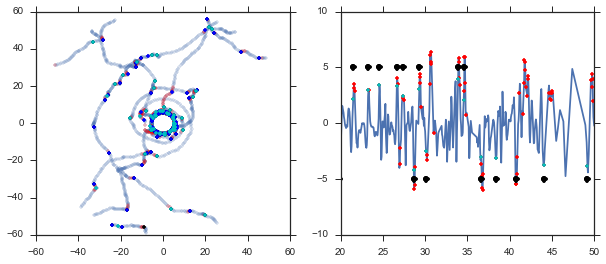

In [97]:
# Visualise detected turns
perFlyX = FOAllFlies_df.query(querystring).iloc[:,keyind_xPos:keyind_xPos+1].squeeze().astype('float').values
perFlyY = FOAllFlies_df.query(querystring).iloc[:,keyind_yPos:keyind_yPos+1].squeeze().astype('float').values

fig = plt.figure(figsize=(10,4))
fig.add_subplot(121)
plt.plot(perFlyX,perFlyY,'.',alpha=0.2)
plt.plot(perFlyX[turnMask],perFlyY[turnMask],'r.',alpha=0.2)
plt.plot(perFlyX[turnStart],perFlyY[turnStart],'k.')
plt.plot(perFlyX[turnStartL],perFlyY[turnStartL],'b.')
plt.plot(perFlyX[turnStartR],perFlyY[turnStartR],'c.')

fig.add_subplot(122)
plt.plot(perFlytime,perFlyRot)
plt.plot(perFlytime[perFlyRot_filt>turnTH_pos],perFlyRot[perFlyRot_filt>turnTH_pos],'r.')
plt.plot(perFlytime[perFlyRot_filt<turnTH_neg],perFlyRot[perFlyRot_filt<turnTH_neg],'r.')
plt.plot(perFlytime[turnStart],perFlyRot[turnStart],'c.')
plt.plot(perFlytime[turnStart],turnSide*5,'ko')
plt.xlim((20,50))
plt.ylim((-10,10))

print(len(turnStart))

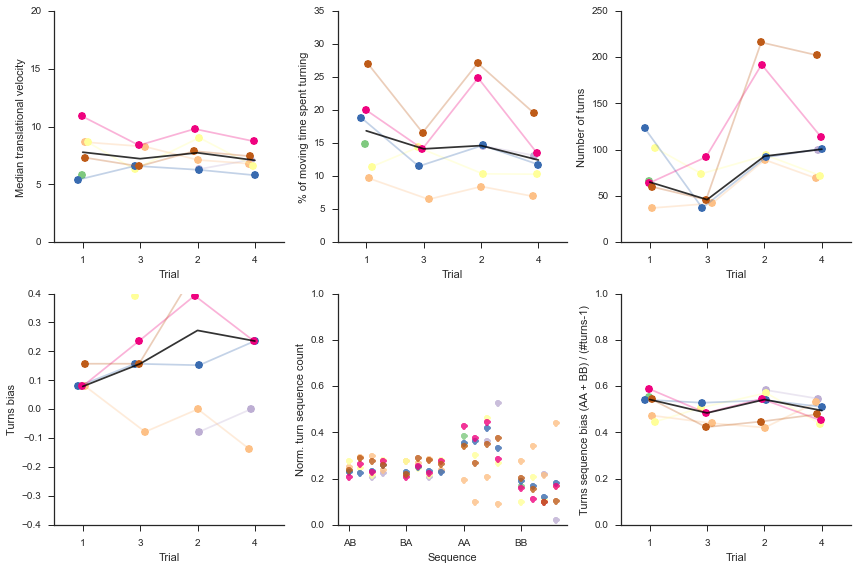

In [98]:
# Only include moving flies
querystring = '(moving > 0)'
vRot = FOAllFlies_df.query(querystring).iloc[:,keyind_vR:keyind_vR+1].squeeze().astype('float').values
time = FOAllFlies_df.query(querystring).iloc[:,keyind_t:keyind_t+1].squeeze().astype('float').values

# Find turnTH over all flies
vRot_filt = np.convolve(vRot, np.ones((5,))/5, mode='same')
turnTH_pos = 2*np.std(vRot_filt[vRot_filt>=0])
turnTH_neg = -2*np.std(vRot_filt[vRot_filt<=0])


Fig = plt.figure(figsize=(12,8))

percentMoving = np.zeros((numFlies,numtrials))
perFlyTurnTH = np.zeros((numFlies,numtrials))
perFlyNumTurn = np.zeros((numFlies,numtrials))
perFlyTurnDir = np.zeros((numFlies,numtrials))
perFlyTurnSeqBias = np.zeros((numFlies,numtrials))

randJitter = np.zeros((numFlies,numtrials))

perFlyMovingPlt = Fig.add_subplot(231)
plt.xticks([1,2,3,4],trialName, rotation='horizontal')
perFlyTurnTHPlt = Fig.add_subplot(232)
plt.xticks([1,2,3,4],trialName, rotation='horizontal')
perFlyNumTurnPlt = Fig.add_subplot(233)
plt.xticks([1,2,3,4],trialName, rotation='horizontal')

perFlyTurnDirPlt = Fig.add_subplot(234)
plt.xticks([1,2,3,4],trialName, rotation='horizontal')
perFlyTurnSeqPlt = Fig.add_subplot(235)
plt.xticks([0,1,2,3],['AB','BA','AA','BB'])
perFlyTurnSeqBiasPlt = Fig.add_subplot(236)
plt.xticks([1,2,3,4],trialName, rotation='horizontal')

for fly in range(numFlies):
    for trial in range(numtrials):
        
        jitter = np.random.uniform(-0.1, 0.1)
        randJitter[fly,trial] = jitter
        
        querystring = '(trial == ' + str(trial+1) + ') & (flyID == "'+ flyIDs[fly] +  '")'
        perFlyMoving = FOAllFlies_df.query(querystring).iloc[:,keyind_mov:keyind_mov+1].squeeze().astype('bool')
        
        if 100*sum(perFlyMoving)/max(1,len(perFlyMoving)) < 40:
            percentMoving[fly,trial] = np.nan
            perFlyTurnTH[fly,trial] = np.nan
            perFlyNumTurn[fly,trial] = np.nan
            perFlyTurnDir[fly,trial] = np.nan
            perFlyTurnSeqBias[fly,trial] = np.nan
            
            continue

        querystring = \
            '(trial == ' + str(trial+1) + ') & (flyID == "'+ flyIDs[fly] +\
            '") & (moving > 0) & (objectDistance >= 20) & (objectDistance <= 50)'
        perFlyTra = FOAllFlies_df.query(querystring).iloc[:,keyind_vT:keyind_vT+1].squeeze().astype('float').values
        perFlyRot = FOAllFlies_df.query(querystring).iloc[:,keyind_vR:keyind_vR+1].squeeze().astype('float').values
        
        perFlyRot_filt = np.convolve(perFlyRot, np.ones((5,))/5, mode='same')
        
        turnMask = np.logical_or(perFlyRot_filt>turnTH_pos,perFlyRot_filt<turnTH_neg)
        turnLoc = np.where(turnMask>0)[0]
        turnStart = turnLoc[np.where(np.hstack((0,np.diff(turnLoc)))>minTurnDist)[0]]
        turnSide = np.sign(perFlyRot[turnStart])
        
        try:
            turnSeq = np.zeros(len(turnStart)-1)
            turnSeq[np.where(((np.diff(turnSide)+0.5)*turnSide[:-1])==0.5)[0]] = 2
            turnSeq[np.where(((np.diff(turnSide)+0.5)*turnSide[:-1])==-0.5)[0]] = 3
            turnSeq[np.where(((np.diff(turnSide)+0.5)*turnSide[:-1])==-1.5)[0]] = 0
            turnSeq[np.where(((np.diff(turnSide)+0.5)*turnSide[:-1])==-2.5)[0]] = 1
            
            numBin = 4
            [n,edgs] = np.histogram(turnSeq,bins=numBin)
        
        except ValueError:
            print('Not enought turns in fly' + str(fly))
            n = np.ones(numBin)*np.nan
            
        perFlyTurnTH[fly,trial] = 100.0*(sum(perFlyRot_filt>turnTH_pos) + sum(perFlyRot_filt<turnTH_neg))/max(1,len(perFlyRot_filt))
        perFlyNumTurn[fly,trial] = len(turnStart)
        perFlyTurnDir[fly,trial] = np.nanmedian(perFlyRot)
        #abs((1.0*sum(perFlyRot_filt>turnTH_pos) - sum(perFlyRot_filt<turnTH_neg))/
        #                               max(1.0*sum(perFlyRot_filt>turnTH_pos) + sum(perFlyRot_filt<turnTH_neg),1))
        perFlyTurnSeqBias[fly,trial] = float(sum(n[2:]))/sum(n)
        
        alphaVal = min(perFlyNumTurn[fly,trial]/3,1)
        
        percentMoving[fly,trial] = np.nanmedian(perFlyTra)
        
        perFlyMovingPlt.plot(trial+1+jitter,percentMoving[fly,trial],'.',
                             markersize=15,color = flyCMap.to_rgba(fly))
        
        perFlyTurnTHPlt.plot(trial+1+jitter,perFlyTurnTH[fly,trial],'.',
                             markersize=15,color = flyCMap.to_rgba(fly))
        perFlyNumTurnPlt.plot(trial+1+jitter,perFlyNumTurn[fly,trial],'.',
                             markersize=15,color = flyCMap.to_rgba(fly))
        perFlyTurnDirPlt.plot(trial+1+jitter,perFlyTurnDir[fly,trial],'.',
                              markersize=15,color = flyCMap.to_rgba(fly))
        
        perFlyTurnSeqPlt.plot(range(numBin)+np.ones(numBin)*0.2*trial,n/(np.ones(numBin)*sum(n)),
                              marker = 'o',linestyle='none',alpha = 0.8,color = flyCMap.to_rgba(fly))
        
        perFlyTurnSeqBiasPlt.plot(trial+1+jitter,perFlyTurnSeqBias[fly,trial],'.',
                             markersize=15,color = flyCMap.to_rgba(fly))
        
    perFlyMovingPlt.plot(range(1,numtrials+1)+randJitter[fly,:],percentMoving[fly,:],'-',
                         markersize=15,color = flyCMap.to_rgba(fly), alpha=0.3)    
    perFlyTurnTHPlt.plot(range(1,numtrials+1)+randJitter[fly,:],perFlyTurnTH[fly,:],'-',
                         markersize=15,color = flyCMap.to_rgba(fly), alpha=0.3)
    perFlyNumTurnPlt.plot(range(1,numtrials+1)+randJitter[fly,:],perFlyNumTurn[fly,:],'-',
                         markersize=15,color = flyCMap.to_rgba(fly), alpha=0.3)
    perFlyTurnDirPlt.plot(range(1,numtrials+1)+randJitter[fly,:],perFlyTurnDir[fly,:],'-',
                         markersize=15,color = flyCMap.to_rgba(fly), alpha=0.3)
    perFlyTurnSeqBiasPlt.plot(range(1,numtrials+1)+randJitter[fly,:],perFlyTurnSeqBias[fly,:],'-',
                         markersize=15,color = flyCMap.to_rgba(fly), alpha=0.3)
    
#plot average response
perFlyMovingPlt.plot(range(1,numtrials+1),np.nanmean(percentMoving,axis=0),color='k',alpha=0.8)
perFlyTurnTHPlt.plot(range(1,numtrials+1),np.nanmedian(perFlyTurnTH,axis=0),color='k',alpha=0.8)
perFlyNumTurnPlt.plot(range(1,numtrials+1),np.nanmedian(perFlyNumTurn,axis=0),color='k',alpha=0.8)
perFlyTurnDirPlt.plot(range(1,numtrials+1),np.nanmedian(perFlyTurnDir,axis=0),color='k',alpha=0.8)
perFlyTurnSeqBiasPlt.plot(range(1,numtrials+1),np.nanmedian(perFlyTurnSeqBias,axis=0),color='k',alpha=0.8)

# Beautify axes
perFlyMovingPlt.set_ylim(0,20)
perFlyMovingPlt.set_xlim(0.5,numtrials+0.5)
perFlyMovingPlt.set_xlabel('Trial')
perFlyMovingPlt.set_ylabel('Median translational velocity')
myAxisTheme(perFlyMovingPlt)

perFlyTurnTHPlt.set_ylim(0,35)
perFlyTurnTHPlt.set_xlim(0.5,numtrials+0.5)
perFlyTurnTHPlt.set_xlabel('Trial')
perFlyTurnTHPlt.set_ylabel('% of moving time spent turning')
myAxisTheme(perFlyTurnTHPlt)

perFlyNumTurnPlt.set_xlim(0.5,numtrials+0.5)
perFlyNumTurnPlt.set_xlabel('Trial')
perFlyNumTurnPlt.set_ylabel('Number of turns')
myAxisTheme(perFlyNumTurnPlt)

perFlyTurnDirPlt.set_ylim(-0.4,0.4)#(0,1)
perFlyTurnDirPlt.set_xlim(0.5,numtrials+0.5)
perFlyTurnDirPlt.set_xlabel('Trial')
perFlyTurnDirPlt.set_ylabel('Turns bias')
myAxisTheme(perFlyTurnDirPlt)

perFlyTurnSeqPlt.set_ylim(0,1)
perFlyTurnSeqPlt.set_xlim(-0.2,numBin-0.2)
perFlyTurnSeqPlt.set_xlabel('Sequence')
perFlyTurnSeqPlt.set_ylabel('Norm. turn sequence count')
myAxisTheme(perFlyTurnSeqPlt)

perFlyTurnSeqBiasPlt.set_ylim(0,1)
perFlyTurnSeqBiasPlt.set_xlim(0.5,numtrials+0.5)
perFlyTurnSeqBiasPlt.set_xlabel('Trial')
perFlyTurnSeqBiasPlt.set_ylabel('Turns sequence bias (AA + BB) / (#turns-1)')
myAxisTheme(perFlyTurnSeqBiasPlt)

Fig.tight_layout()

try:
    mkdir(analysisDir + sep + 'compareReinforcementTrials' + sep)
except OSError:
    print('Analysis directory already exists.')

Fig.savefig(analysisDir+'compareReinforcementTrials/'+genotype+'_'+flyIDs[0][0]
            +'_reinfTrials'+'_n'+str(len(flyIDs))+'.pdf', format='pdf')

In [99]:
# Possible other metrics to look at:
#   -  locations of turns


### Analysis of steering maneuvres and their relationship with the object location

#### Turnrate relative to object distance

## TODO: Improve definition of turns; don't count all above-threshold events as individual turns

In [110]:
def getTurnHistCounts(rotationMeasure, objDist, turnTH, turnTH_neg, turnTH_pos, numBins):
    
    d_objDist = np.hstack((0, np.diff(objDist)))
    
    selectPts_apr = d_objDist<0
    selectPts_dep = d_objDist>0

    selectPts_apr_turn = np.logical_and(selectPts_apr,abs(rotationMeasure) > turnTH)
    selectPts_apr_turnR = np.logical_and(selectPts_apr,rotationMeasure < turnTH_neg)
    selectPts_apr_turnL = np.logical_and(selectPts_apr,rotationMeasure > turnTH_pos)

    selectPts_dep_turn = np.logical_and(selectPts_dep,abs(rotationMeasure) > turnTH)
    selectPts_dep_turnR = np.logical_and(selectPts_dep,rotationMeasure < turnTH_neg)
    selectPts_dep_turnL = np.logical_and(selectPts_dep,rotationMeasure > turnTH_pos)

    [nTL_apr,edges] = np.histogram(objDist[selectPts_apr_turnL],bins=numBins,range=(5,55))
    [nTR_apr,edges] = np.histogram(objDist[selectPts_apr_turnR],bins=numBins,range=(5,55))
    [nT_apr,edges] = np.histogram(objDist[selectPts_apr_turn],bins=numBins,range=(5,55))
    [nDt_apr,edges] = np.histogram(objDist[selectPts_apr],bins=numBins,range=(5,55))

    [nTL_dep,edges] = np.histogram(objDist[selectPts_dep_turnL],bins=numBins,range=(5,55))
    [nTR_dep,edges] = np.histogram(objDist[selectPts_dep_turnR],bins=numBins,range=(5,55))
    [nT_dep,edges] = np.histogram(objDist[selectPts_dep_turn],bins=numBins,range=(5,55))
    [nDt_dep,edges] = np.histogram(objDist[selectPts_dep],bins=numBins,range=(5,55))
    
    return nTL_apr, nTL_dep, nTR_apr, nTR_dep, nT_apr, nT_dep, nDt_apr, nDt_dep,edges

In [117]:
def turnRatePerDistance(Fig,FOAllFlies_df,numVisTrials,movementFilter,useTurnIndex):
    legendText = []
    
    keyind_xPos = keylistLong.index('xPosInMiniarena')
    keyind_yPos = keylistLong.index('yPosInMiniarena')
    keyind_vT = keylistLong.index('transVelo')
    keyind_vR = keylistLong.index('rotVelo')
    
    # Find turnTH over all flies
    querystring = '('+movementFilter+') & (objectDistance>5.5)'
    vRot = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_vR:keyind_vR+1]).squeeze()
    
    if useTurnIndex:
        vTrans = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_vT:keyind_vT+1]).squeeze()
        vRot_filt = np.convolve(vRot/vTrans, np.ones((5,))/5, mode='same')
        vRot_filt[np.isinf(abs(vRot_filt))] = 0.0
    else:
        vRot_filt = np.convolve(vRot, np.ones((5,))/5, mode='same')
        
    turnTH_pos = 3*np.nanstd(vRot_filt[vRot_filt>=0])
    turnTH_neg = -3*np.nanstd(vRot_filt[vRot_filt<=0])
    turnTH = 3*np.nanstd(abs(vRot_filt))


    axApr = Fig.add_subplot(121)
    axApr.set_title('Approaches', fontsize=12)
    axDep = Fig.add_subplot(122)
    axDep.set_title('Departures', fontsize=12)

    # visible object ....................................................
    objecttype = "visible"
    numVisTrials = 2
    visAprCMap = plt.cm.ScalarMappable(norm=colors.Normalize(vmin=-1, vmax=numVisTrials),cmap='Blues')
    visDepCMap = plt.cm.ScalarMappable(norm=colors.Normalize(vmin=-1, vmax=numVisTrials),cmap='Greens')
    for trial in range(1,numVisTrials+1):
        querystring = '(trialtype=="'+objecttype+'") & (trial=='+ str(trial) +') & ('+movementFilter+') & (objectDistance>5.5)'
        xPosFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_xPos:keyind_xPos+1]).squeeze()
        yPosFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_yPos:keyind_yPos+1]).squeeze()
        vRotFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_vR:keyind_vR+1]).squeeze()

        objDist,theta = cartesian2polar(xPosFly,yPosFly)
        d_objDist = np.hstack((0, np.diff(objDist)))
        
        if useTurnIndex:
            vTransFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_vT:keyind_vT+1]).squeeze()
            vRotFly_filt = np.convolve(vRotFly/vTransFly, np.ones((5,))/5, mode='same')
        else:
            vRotFly_filt = np.convolve(vRotFly, np.ones((5,))/5, mode='same')

        # Get counts
        nTL_apr, nTL_dep, nTR_apr, nTR_dep, nT_apr, nT_dep, nDt_apr, nDt_dep, edges\
            = getTurnHistCounts(vRotFly_filt, objDist, turnTH, turnTH_neg, turnTH_pos, numBins)

        axApr.plot(edges[:-1]+np.mean(np.diff(edges))/2.0,1.0*nT_apr/nDt_apr,color=visAprCMap.to_rgba(trial))
        axDep.plot(edges[:-1]+np.mean(np.diff(edges))/2.0,1.0*nT_dep/nDt_dep,color=visDepCMap.to_rgba(trial))

        legendText.append('visible t'+str(trial))

    # invisible object .................................................
    
    objecttype = "invisible"
    trial = 4
    querystring = '(trialtype=="'+objecttype+'") & (trial=='+ str(trial) +') & ('+movementFilter+') & (objectDistance>5.5)'
    xPosFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_xPos:keyind_xPos+1]).squeeze()
    yPosFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_yPos:keyind_yPos+1]).squeeze()
    vRotFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_vR:keyind_vR+1]).squeeze()

    objDist,theta = cartesian2polar(xPosFly,yPosFly)
    d_objDist = np.hstack((0, np.diff(objDist)))
    
    if useTurnIndex:
        vTransFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_vT:keyind_vT+1]).squeeze()
        vRotFly_filt = np.convolve(vRotFly/vTransFly, np.ones((5,))/5, mode='same')
    else:
        vRotFly_filt = np.convolve(vRotFly, np.ones((5,))/5, mode='same')

    # Get counts
    nTL_apr, nTL_dep, nTR_apr, nTR_dep, nT_apr, nT_dep, nDt_apr, nDt_dep, edges\
        = getTurnHistCounts(vRotFly_filt, objDist, turnTH, turnTH_neg, turnTH_pos, numBins)

    axApr.plot(edges[:-1]+np.mean(np.diff(edges))/2.0,1.0*nT_apr/nDt_apr,'grey')
    axDep.plot(edges[:-1]+np.mean(np.diff(edges))/2.0,1.0*nT_dep/nDt_dep,'grey')
    legendText.append('invisible')


    axApr.set_xlabel('object distance [mm]')
    axApr.set_ylabel('normalised turn count')
    axApr.set_ylim(0,0.12)
    axApr.set_xlim(0,arenaRad)
    axApr.legend(legendText)
    myAxisTheme(axApr)

    axDep.set_xlabel('object distance [mm]')
    axDep.set_ylim(0,0.12)
    axDep.set_xlim(0,arenaRad)
    axDep.legend(legendText)
    myAxisTheme(axDep)

    Fig.tight_layout()
    
    return Fig

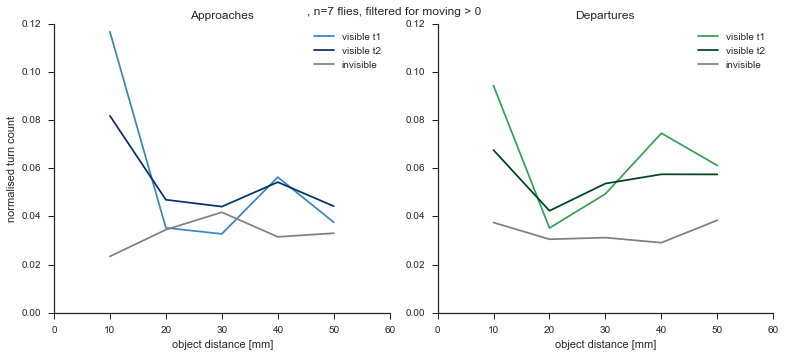

In [118]:
numBins = 5
useTurnIndex = False

movementFilter='moving > 0'
Fig = plt.figure(figsize=(11,5))
Fig.suptitle(', n='+str(numFlies)+' flies, filtered for '+movementFilter , fontsize=12)
Fig = turnRatePerDistance(Fig,FOAllFlies_df,3,movementFilter,useTurnIndex)

Analysis directory already exists.
Plot directory already exists.


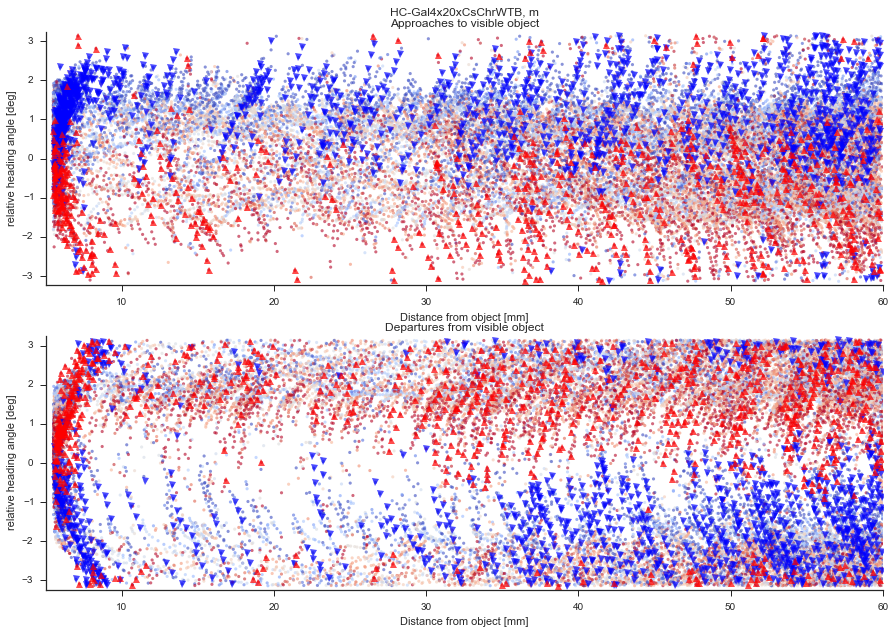

In [109]:
# Get objfrom trajectoryDerivedParams import cartesian2polar, polarCurvature
from trajectoryDerivedParams import cartesian2polar, polarCurvature
from flyTracePlots import plotPolarTrace

condition = "visible"
rZone = "off"
querystring = \
 '(reinforcement=="'+rZone+'") & (trialtype=="'+condition+'")&(moving>0)&(objectDistance>5.5)'
xPosFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_xPos:keyind_xPos+1]).squeeze()
yPosFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_yPos:keyind_yPos+1]).squeeze()
gammaFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_gam:keyind_gam+1]).squeeze()
gammaFullFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_gamful:keyind_gamful+1]).squeeze()
angleFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_ang:keyind_ang+1]).squeeze()
timeFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_t:keyind_t+1]).squeeze()
vTransFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_vT:keyind_vT+1]).squeeze()
vRotFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_vR:keyind_vR+1]).squeeze()


from scipy.ndimage.filters import gaussian_filter
N = 5
vRotFilt_ds = np.convolve(vRotFly, np.ones((N,))/N, mode='same')

# transform trajectory to polar coordinates
objDist,theta = cartesian2polar(xPosFly,yPosFly)

# compute curvature
polarCurv, d_theta, dtheta_objDist = polarCurvature(theta,objDist)

d_objDist = np.hstack((0, np.diff(objDist)))

# Compute sign of turn relative to object
turnSign = np.sign(polarCurv)
turnSign[d_theta>0] = np.sign(polarCurv[d_theta>0])
turnSign[d_theta<0] = -np.sign(polarCurv[d_theta<0])

# Compute curvature-based criterion for turns
q2, q98 = np.percentile(polarCurv[~np.isnan(polarCurv)], [2 ,98])
curvSelect = abs(polarCurv)< (q98 - q2)/2

curvTurnMask_L = polarCurv > q98
curvTurnMask_R = polarCurv < q2

# Generate filtered curvature for plots and curvature magnitude
polarCurvPlt = polarCurv[curvSelect]

curvMag = abs(polarCurv)


selectPts_apr = d_objDist<0
selectPts_dep = d_objDist>0

selectPts_apr_turnR = np.logical_and(selectPts_apr,vRotFilt_ds < -1*turnTH)
selectPts_apr_turnL = np.logical_and(selectPts_apr,vRotFilt_ds > 1*turnTH)
selectPts_dep_turnR = np.logical_and(selectPts_dep,vRotFilt_ds < -1*turnTH)
selectPts_dep_turnL = np.logical_and(selectPts_dep,vRotFilt_ds > 1*turnTH)

fig = plt.figure(figsize=(15,10))

xlimRange = (5,60)
d_objDist = np.hstack((0, np.diff(objDist)))

ax=fig.add_subplot(211)
ax = plotPolarTrace(ax,genotype+', '+flyIDs[0][0] + '\nApproaches to ' + condition + ' object',
                selectPts_apr,selectPts_apr_turnR,selectPts_apr_turnL,objDist,gammaFullFly,vRotFly,xlimRange)

ax=fig.add_subplot(212)
ax = plotPolarTrace(ax,'Departures from '+ condition + ' object',
                selectPts_dep,selectPts_dep_turnR,selectPts_dep_turnL,objDist,gammaFullFly,vRotFly,xlimRange)

makeNestedPlotDirectory(analysisDir, 'polarTrace/', 'rZones_'+ rZones + sep)

#fig.savefig(analysisDir + 'polarTrace/'+genotype+'_'+flyIDs[0][0] + 'rZones_'+ rZones+sep
#            +'_polarTrace'+'_n'+str(len(flyIDs))+'.pdf', format='pdf')ect related parameter
objDirectionFly, objDistFly, gammaFullFly, gammaFly, gammaVFly = relationToObject(timeFly,xPosFly,yPosFly,angleFly,[0,0])

Analysis directory already exists.
Plot directory already exists.


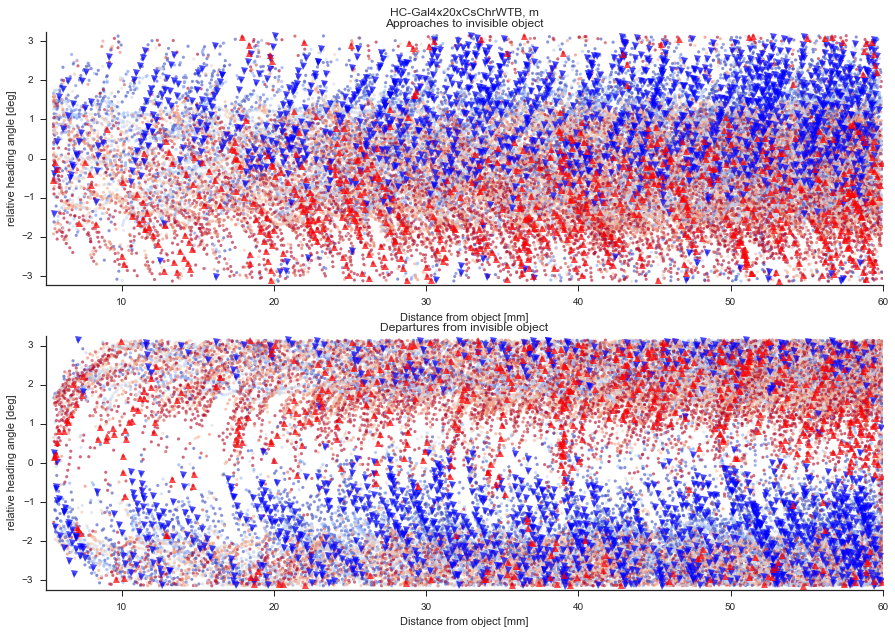

In [108]:
from trajectoryDerivedParams import cartesian2polar, polarCurvature
from flyTracePlots import plotPolarTrace

condition = "invisible"
rZone = "on"
querystring = \
 '(reinforcement=="'+rZone+'") & (trialtype=="'+condition+'")&(moving>0)&(objectDistance>5.5)'
xPosFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_xPos:keyind_xPos+1]).squeeze()
yPosFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_yPos:keyind_yPos+1]).squeeze()
gammaFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_gam:keyind_gam+1]).squeeze()
gammaFullFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_gamful:keyind_gamful+1]).squeeze()
angleFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_ang:keyind_ang+1]).squeeze()
timeFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_t:keyind_t+1]).squeeze()
vTransFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_vT:keyind_vT+1]).squeeze()
vRotFly = np.asarray(FOAllFlies_df.query(querystring).iloc[:,keyind_vR:keyind_vR+1]).squeeze()


from scipy.ndimage.filters import gaussian_filter
N = 5
vRotFilt_ds = np.convolve(vRotFly, np.ones((N,))/N, mode='same')

# transform trajectory to polar coordinates
objDist,theta = cartesian2polar(xPosFly,yPosFly)

# compute curvature
polarCurv, d_theta, dtheta_objDist = polarCurvature(theta,objDist)

d_objDist = np.hstack((0, np.diff(objDist)))

# Compute sign of turn relative to object
turnSign = np.sign(polarCurv)
turnSign[d_theta>0] = np.sign(polarCurv[d_theta>0])
turnSign[d_theta<0] = -np.sign(polarCurv[d_theta<0])

# Compute curvature-based criterion for turns
q2, q98 = np.percentile(polarCurv[~np.isnan(polarCurv)], [2 ,98])
curvSelect = abs(polarCurv)< (q98 - q2)/2

curvTurnMask_L = polarCurv > q98
curvTurnMask_R = polarCurv < q2

# Generate filtered curvature for plots and curvature magnitude
polarCurvPlt = polarCurv[curvSelect]

curvMag = abs(polarCurv)


selectPts_apr = d_objDist<0
selectPts_dep = d_objDist>0

selectPts_apr_turnR = np.logical_and(selectPts_apr,vRotFilt_ds < -1*turnTH)
selectPts_apr_turnL = np.logical_and(selectPts_apr,vRotFilt_ds > 1*turnTH)
selectPts_dep_turnR = np.logical_and(selectPts_dep,vRotFilt_ds < -1*turnTH)
selectPts_dep_turnL = np.logical_and(selectPts_dep,vRotFilt_ds > 1*turnTH)

fig = plt.figure(figsize=(15,10))

xlimRange = (5,60)
d_objDist = np.hstack((0, np.diff(objDist)))

ax=fig.add_subplot(211)
ax = plotPolarTrace(ax,genotype+', '+flyIDs[0][0] + '\nApproaches to ' + condition + ' object',
                selectPts_apr,selectPts_apr_turnR,selectPts_apr_turnL,objDist,gammaFullFly,vRotFly,xlimRange)

ax=fig.add_subplot(212)
ax = plotPolarTrace(ax,'Departures from '+ condition + ' object',
                selectPts_dep,selectPts_dep_turnR,selectPts_dep_turnL,objDist,gammaFullFly,vRotFly,xlimRange)

makeNestedPlotDirectory(analysisDir, 'polarTrace/', 'rZones_'+ rZones + sep)

#fig.savefig(analysisDir + 'polarTrace/'+genotype+'_'+flyIDs[0][0] + 'rZones_'+ rZones+sep
#            +'_polarTrace'+'_n'+str(len(flyIDs))+'.pdf', format='pdf')